<a href="https://colab.research.google.com/github/thomashooks53/undergrad_ml_assignments/blob/main/01_assignment_wrangling_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [1]:
# Used for the Entirety of the Assignment (Load Data)
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [27]:
#Question 1 Part 1
import pandas as pd
import numpy as np

airbnb = pd.read_csv("/content/data/airbnb_hw.csv")

airbnb['Price'].head(50)
# Ran above code to initially manually inspect the Price column, and within the first 50 values, no clear errors were observed

# airbnb['Price'].astype(int)
# The above code reveals that some variables have commas (ValueError: invalid literal for int() with base 10: '1,990')

#Additional Exploration
airbnb['Price'].describe()
airbnb['Price'].isna().value_counts() #Reveals 0 missing values

#Cleaning
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb['Price'] = airbnb['Price'].astype(int)
display(airbnb['Price'].describe())
airbnb['Price'].isna().sum() #Still 0 Missing Values

#Through inspection, the only error in this column was commas, so that is the only thing removed to clean the data.

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


np.int64(0)

In [5]:
# Question 1 Part 2
police = pd.read_csv("/content/data/mn_police_use_of_force.csv")
police.head(30) #Upon first look, roughly 50% of injuries are NaN
police['subject_injury'].describe()
police['subject_injury'].unique() #Shows only values are 'No', 'Yes', and nan
police['subject_injury'].value_counts(dropna=False) #Reveals 9848 rows have no value for this variable
police['subject_injury'].isna().mean() #Reveals 76.19% of values are missing

display(pd.crosstab(police['subject_injury'],police['force_type'], dropna=False)) #All force types are predominantly missing the injury data, but Chemical irritants stick out with 1421 missing and only 172 reported. The more severe types of force have more reported injuries, such as bodily force with 2379 injury values

police['subject_injury'] = police['subject_injury'].fillna('Missing')
police.head(30) #NaN is now shown as Missing
police['subject_injury'].value_counts(dropna=False) #Confirms only "No", "Yes", and "Missing" are present


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


,count
subject_injury,
Missing,9848
Yes,1631
No,1446


In [ ]:
# Question 1 Part 3
metabric = pd.read_csv("/content/data/metabric.csv")
metabric.head(30)

metabric['Overall Survival Status'].value_counts() #Currently 1:DECEASED and 0:Living

metabric['Overall Survival Status'] = metabric['Overall Survival Status'].map({
    '1:DECEASED': 0,
    '0:LIVING': 1
})

metabric['Overall Survival Status'].value_counts() #Now Deceased is written as 0 and Living is 1, the counts still

,count
Overall Survival Status,
0,768
1,575


In [ ]:
# Question 1 Part 4
airbnb_two = pd.read_csv("/content/data/airbnb_hw.csv")

airbnb['Review Scores Rating'].isna().sum() #8323 missing values

median_rating = airbnb['Review Scores Rating'].median(skipna=True)
median_rating #Median rating of 94.0

airbnb['Review Scores Rating Imputed'] = airbnb['Review Scores Rating'].fillna(median_rating)
airbnb.head(8) #There is now a new column where missing values are now input as 94, and for rows that already has data, the original data is kept

#This will create a bias towards higher ratings, as low-end rentals might be far less likely to be booked, resulting in the lack of reviews. This means that, if they were to be booked, they likely wouldn't be rated as highly as the popular bookings whose reviews the imputed value is based off of.

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review Scores Rating Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0,94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

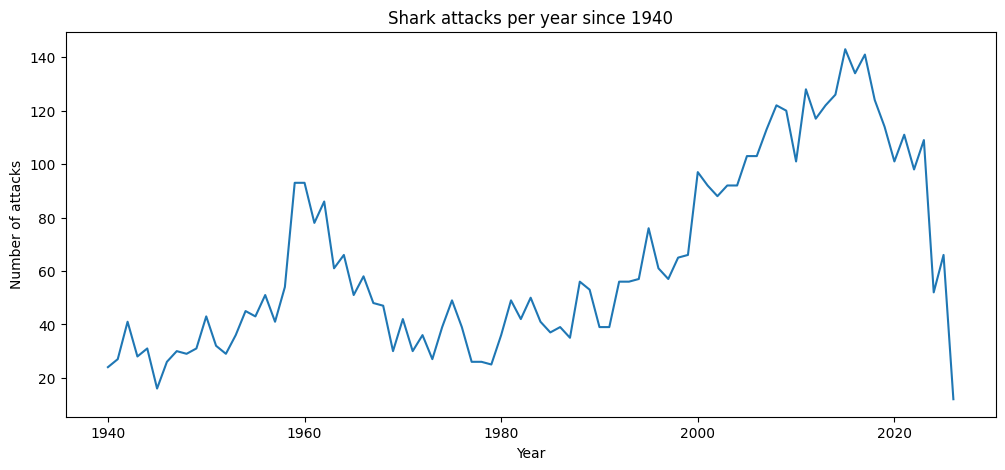

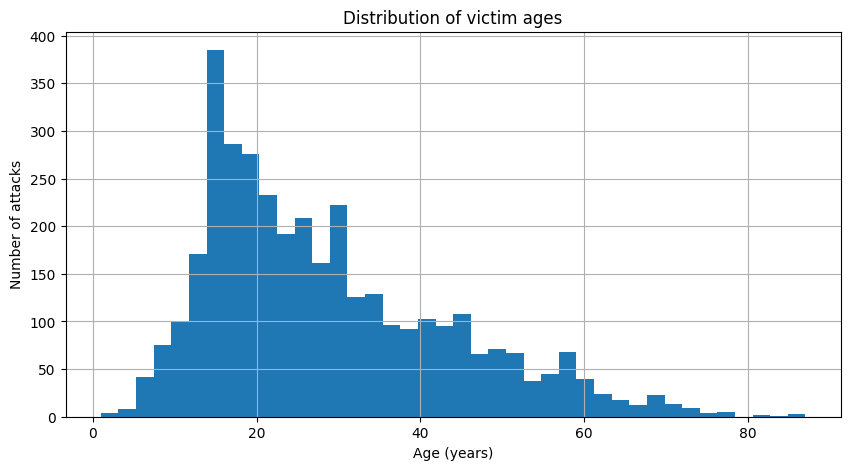

Proportion of unprovoked attacks: 0.74


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742250,0.015117,0.242633


In [ ]:
#Question 2

from google.colab import files
#uploaded = files.upload() #Upload excel spreadsheet to Colab

#Part 1
shark_attack = pd.read_excel('/content/GSAF5.xls')

#Part 2
shark_attack #Seems to contain additional columns not present in excel
shark_attack.columns #Confirmed to contain 7 Columns that aren't present in excel
shark_attack = shark_attack.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])
shark_attack #Dropped the 7 columns that contained no data  /non-important data

#Part 3
# An observation is a specific case or instance, meaning, in this case, an observation is an individual shark attack. This makes sense as each shark attack has variables attributed to it such as Type or Country, and each of these has a value. It affects cleaning the data, as observations are what are compared in analysis, meaning all observations have to be cleaned into a compatible form that can easily be compared to other observations.

#Part 4
import matplotlib.pyplot as plt

shark_attack['Year'] = pd.to_numeric(shark_attack['Year'], errors='coerce')
shark_attack['Year'].describe() #Confirms 'Year' column is now completely Floats, but the min year of 0 seems wrong
shark_attack.loc[shark_attack['Year'] == 0, ['Date', 'Year']] #When 0 is the year, it means the date is uncertain, so all 0s will also be converted to NaN
shark_attack.loc[shark_attack['Year'] == 0, 'Year'] = pd.NA
shark_attack['Year'].describe() #Minimum year now 5, and values seem more reasonable

shark_recent = shark_attack[shark_attack['Year'] >= 1940]
shark_recent['Year'].describe() #Minimum is now 1940

#Line Plot to Show Trends
attacks_per_year = shark_recent.groupby('Year').size()
attacks_per_year.plot(figsize=(12,5))
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Shark attacks per year since 1940')
plt.show()

#Large Spike in 1960, then steady rise until 2019. Large drop of after 2019 likely due to Covid slowing travel (less beach vacations) and then lack od data for 2026

#Part 5
shark_attack['Age'].describe() #Initial concern with 251 unique ages (People dont live to 251)
shark_attack['Age'].unique() #I see '+', '?', 'Middle age", etc. All these values will have to be converted to NaN.
shark_attack['Age'] = pd.to_numeric(shark_recent['Age'], errors='coerce').astype('Int64') #This will lose values such as age range and ages in months, but that would take an extremely large amount of time to sort through and clean.
shark_attack['Age'].describe() #Now has an appropriate age range of 1-87 and still has 3622 values, a large enough amount for limited analysis.

plt.figure(figsize=(10,5))
shark_attack['Age'].hist(bins=40)
plt.xlabel('Age (years)')
plt.ylabel('Number of attacks')
plt.title('Distribution of victim ages')
plt.show()

#Part 6
shark_attack['Type'].unique() #It can be seen that there are 'Unprovoked' and 'unprovoked' and other similar issues which will have to be manually combined.

shark_attack['Type'] = shark_attack['Type'].astype(str).str.lower().str.strip()

#This function will take in the cleaned data and ensure the three columns required contain all appropriate data
def clean_type(t):
    if 'unprovoked' in t:
        return 'Unprovoked'
    elif 'provoked' in t:
        return 'Provoked'
    else:
        return 'Unknown'

shark_attack['Type'] = shark_attack['Type'].apply(clean_type)

shark_attack['Type'].unique() # Returns: array(['Unprovoked', 'Provoked', 'Unknown'], dtype=object) confirming function worked

prop_unprovoked = shark_attack['Type'].value_counts(normalize=True)['Unprovoked']
print(f"Proportion of unprovoked attacks: {prop_unprovoked:.2f}")

#Part 7
shark_attack['Fatal Y/N'].unique() #Casing and spaces once again require a function to manually integrate all unique values

shark_attack['Fatal Y/N'] = shark_attack['Fatal Y/N'].astype(str).str.lower().str.strip()

def clean_fatal(f):
    if f == 'y':
        return 'Y'
    elif f == 'n':
        return 'N'
    else:
        return 'Unknown'

shark_attack['Fatal Y/N'] = shark_attack['Fatal Y/N'].apply(clean_fatal)

shark_attack['Fatal Y/N'].unique() #Confirmed to only include "Y", "N", and "Unknown"

#Part 8
pd.crosstab(shark_attack['Type'],shark_attack['Fatal Y/N'], normalize='index')

#Shark attacks are far more fatal when unprovoked with 24% fatality rate, versus a 3% fatality rate when provoked

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. **Read the abstract. What is this paper about?**

This paper dives into what exactly a tidy dataset is, and why tidy datasets are a crucial step in the cleaning process. This also leads into a discussion on how tidy tools can be more efficiently and consistently created.

  2. **Read the introduction. What is the "tidy data standard" intended to accomplish?**

The tiny data standard is intended to facilitate initial exploratory data analysis and to simplify the developement of analysis tools that work well together.

  3. **Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**

Tidy datasets are described as being all alike due to the definition of what they are. Tidy datasets all follow a strict structure in which each variable is a column, each observation is a row, and each type of observational unit forms a table. This means that, even if the values themselves are different, all tidy datasets will be organized in the same way, allowing data to be explored in the same way. Alternatively, a messy dataset may have multiple variables in a column, or observations that overlap. Each messy dataset is going to have different forms of these structural inconsistencies that require a different method to clean. This is what entails it is messy in its own way.

The second sentence means that there is significant variation in what can be considered an observation or a variable. For example, a date could be treated as an observation in one context but as a variable in another. Similarly, observations and variables are not limited to numeric values; they can be text, locations, categories, or other types of information. Because their definitions depend heavily on context and research goals, it is difficult to define observations and variables in a universal way.

  4. **Read Section 2.2. How does Wickham define values, variables, and observations?**

Values: Qualitative or quantitative things that make up a dataset and belong to both an observation and a variable

Variables: Contains all values that measure the same underlying attribute across units

Observations: Contains all values measured on the same unit across attributyes

  5. **How is "Tidy Data" defined in section 2.3?**

Tiny data is defined as being a standard way to connect the meaning of a dataset to its structure. The meaning of this is demonstrated and defined by the three rules below.

1. Each variable forms a column

2. Each observation forms a row

3. Each type of observational unit forms a table

When these 3 conditions are met, the dataset's meaning becomes inherently written in its form.

  6. **Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**

5 Common Problems with messy datasets:

 1. Column headers are values, not variable names.

 2. Multiple variables are stored in one column.

 3. Variables are stored in both rows and columns.

 4. Multiple types of observational units are stored in the same table.

 5. A single observational unit is stored in multiple tables.

 The data in Table 4 is messy because the variables make up both the columns and the rows. Additionally, the column headers are values, not variables.

 "Melting" a dataset is when columns are turned into rows, effectively stacking the dataset. To do so, the columns that aren't yet variables are converted into two new variables, column and value.

  7. **Why, specifically, is table 11 messy but table 12 tidy and "molten"?**

  Table 11 is messy because the column headers are values, not variables. Additionally, two different variables (tmax and tmin) are stored in the same column. Going back to the definition of a tidy dataset, eveyr variable must be its own column.

  Table 12a becomes molten because there is now the two variable columns, a column column, and a value column. This means each row is now only 1 observation.

  Table 21b becomes truly tidy because tmin and tmax are separated, finally giving every variable its own column.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

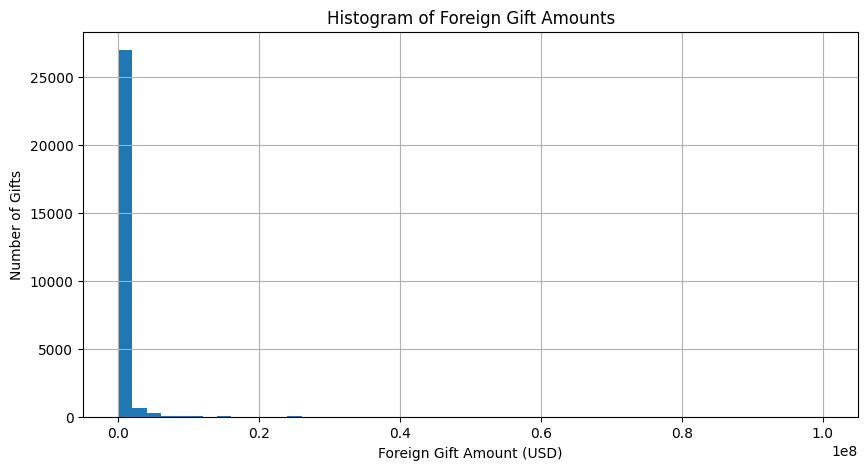

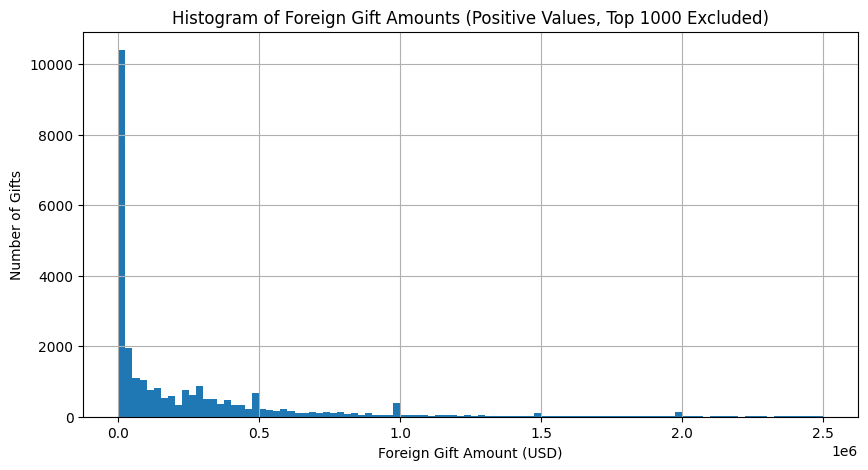

,count
Gift Type,
Contract,17250
Monetary Gift,10936
Real Estate,11


,proportion
Gift Type,
Contract,0.611767
Monetary Gift,0.387843
Real Estate,0.000390


,Foreign Gift Amount
Country of Giftor,
ENGLAND,3654
CHINA,2461
CANADA,2344
JAPAN,1891
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1433
GERMANY,1393
HONG KONG,1080


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464933703
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,656325544
SWITZERLAND,619899445


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


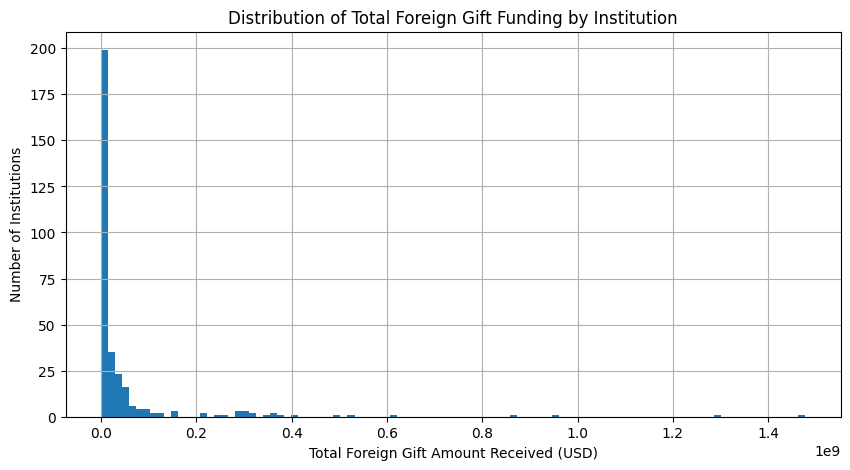

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [26]:
#Question 4
import pandas as pd
import matplotlib.pyplot as plt

#Part 1
gifts = pd.read_csv("/content/data/ForeignGifts_edu.csv")
gifts.head()

#Part 2
gifts['Foreign Gift Amount'] = pd.to_numeric(gifts['Foreign Gift Amount'], errors='coerce')
gifts['Foreign Gift Amount'].describe() #Confirms float as type, but also shows a negative value that I wish to remove

gifts = gifts[gifts['Foreign Gift Amount'] > 0] #Gets rid of negative value described above

plt.figure(figsize=(10,5))
gifts['Foreign Gift Amount'].hist(bins=50)
plt.xlabel('Foreign Gift Amount (USD)')
plt.ylabel('Number of Gifts')
plt.title('Histogram of Foreign Gift Amounts')
plt.show() #This histogram is extremely right-skewed due to the large donation outliers (Ex. $100 million), but most donations are vastly smaller at around $400,0000

#Exclude some outlier gifts to better visualize the majority
gifts_clean_no_top1000 = gifts.sort_values(
    by='Foreign Gift Amount', ascending=False
).iloc[1000:]

plt.figure(figsize=(10,5)) #Plot histogram with the top gifts excluded (Not necessary, but I am curious)
gifts_clean_no_top1000['Foreign Gift Amount'].hist(bins=100)
plt.xlabel('Foreign Gift Amount (USD)')
plt.ylabel('Number of Gifts')
plt.title('Histogram of Foreign Gift Amounts (Positive Values, Top 1000 Excluded)')
plt.show() # Still right-skewed, but some peaks can be seen such as at $5 million

#Part 3
display(gifts['Gift Type'].value_counts())
display(gifts['Gift Type'].value_counts(normalize=True)) #Majority are Contracts, almost none are real estate

#Part 4
top_countries_count = (
    gifts.groupby('Country of Giftor')
      .count()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)
display(top_countries_count) #England has the highest number of gifts

top_countries_amount = (
    gifts.groupby('Country of Giftor')
      .sum()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)
display(top_countries_amount) #Qatar has gifted the highest amount of money

#Interesting that Qatar is 11th of number of gifts and easily first in amount, indicating large amounts for each gift

#Part 5
top_receiving_amount = (
    gifts.groupby('Institution Name')
      .sum()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)
display(top_receiving_amount) #Primarily the elite American private universities

institution_totals = (
    gifts.groupby('Institution Name')
      .sum()['Foreign Gift Amount']
)

plt.figure(figsize=(10,5))
institution_totals.hist(bins=100)
plt.xlabel('Total Foreign Gift Amount Received (USD)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Foreign Gift Funding by Institution')
plt.show() #Demonstrates that most institutions receive small funding, and the few elite are true outliers in their large amounts of funding

#Part 6
top_giftors = (
    gifts.groupby('Giftor Name')
      .sum()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)
display(top_giftors) #Primarily Qatar organizations, followed by anonymous donors and religious groups

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

(3798, 63)


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


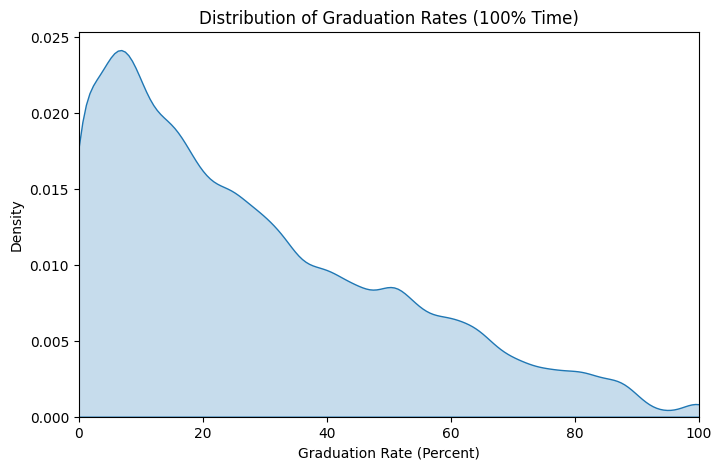

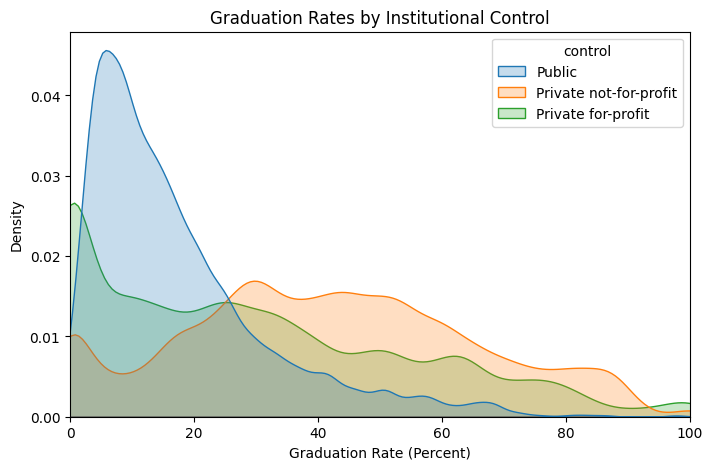

In [36]:
#Question 5
import seaborn as sns

#Part 1
college = pd.read_csv("/content/data/college_completion.csv")

#Part 2
college.head(10)
print(college.shape) #3798 rows described the number of observations and 63 columns describes the number of variables

#Part 3
display(pd.crosstab(college['control'], college['level']))

# Almost all Private not-for-profits are 4-year, whereas Private for-profits lean towards 4-year, and Public leans towards 2-year

#Part 4

#Standard KDE
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=college,
    x='grad_100_value',
    bw_adjust=0.5,
    fill=True
)
plt.xlim(0, 100)
plt.xlabel('Graduation Rate (Percent)')
plt.ylabel('Density')
plt.title('Distribution of Graduation Rates (100% Time)')
plt.show() #Graph is heavily right-skewed, with most institutions surprisingly having graduation rates of <20. The amount of institutions linearly declines with graduation rate, until a final jump around 90%

#KDE Conditioned on Control
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=college,
    x='grad_100_value',
    hue='control',
    fill=True,
    bw_adjust=0.5,
    common_norm=False
)
plt.xlim(0, 100)
plt.xlabel('Graduation Rate (Percent)')
plt.ylabel('Density')
plt.title('Graduation Rates by Institutional Control')
plt.show()


#Part 5


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [4]:
#Question 7

#Part 1
prices = pd.read_csv("/content/data/metabric.csv")
prices.head(30)

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0
5,56.45,BREAST CONSERVING,Breast Cancer,YES,YES,1.0,4.0,4.020,164.333333,0:LIVING,YES,5.230071,10.0,2.0
6,89.08,BREAST CONSERVING,Breast Cancer,NO,YES,1.0,1.0,4.058,99.533333,1:DECEASED,YES,1.307518,29.0,2.0
7,86.41,BREAST CONSERVING,Breast Cancer,NO,YES,1.0,4.0,5.032,36.566667,1:DECEASED,YES,5.230071,16.0,2.0
8,84.22,MASTECTOMY,Breast Cancer,NO,NO,0.0,5.0,3.056,36.266667,1:DECEASED,NO,6.537589,28.0,2.0
9,85.49,MASTECTOMY,Breast Cancer,NO,YES,0.0,1.0,3.044,132.033333,1:DECEASED,YES,1.307518,22.0,4.0
